# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity =response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | smithers
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | labrador city
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | middelburg
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | fale old settlement
Processing Record 10 of Set 1 | palikir - national government center
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | buga
Processing Record 13 of Set 1 | rakops
Processing Record 14 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 15 of Set 1 | melekeok village
Processing Record 16 of Set 1 | salinopolis
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of 

Processing Record 34 of Set 4 | balakhta
Processing Record 35 of Set 4 | machico
Processing Record 36 of Set 4 | alpine
Processing Record 37 of Set 4 | ponta delgada
Processing Record 38 of Set 4 | keflavik
Processing Record 39 of Set 4 | fortaleza
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | okondja
Processing Record 42 of Set 4 | ouellah
City not found. Skipping...
Processing Record 43 of Set 4 | mil'kovo
Processing Record 44 of Set 4 | greenwood
Processing Record 45 of Set 4 | vorgashor
Processing Record 46 of Set 4 | afaahiti
Processing Record 47 of Set 4 | nar'yan-mar
Processing Record 48 of Set 4 | wamba
Processing Record 49 of Set 4 | hasaki
Processing Record 0 of Set 5 | maieru
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | kalianget
Processing Record 3 of Set 5 | luanda
Processing Record 4 of Set 5 | sheboygan
Processing Record 5 of Set 5 | whakatane
Processing Record 6 of Set 5 | remire-montjoly
Processing Record 7 of 

Processing Record 26 of Set 8 | porto velho
Processing Record 27 of Set 8 | mahdia
Processing Record 28 of Set 8 | pisco
Processing Record 29 of Set 8 | tonj
Processing Record 30 of Set 8 | impfondo
Processing Record 31 of Set 8 | antsiranana
Processing Record 32 of Set 8 | alicante
Processing Record 33 of Set 8 | sao joao dos inhamuns
Processing Record 34 of Set 8 | pacol
Processing Record 35 of Set 8 | kapa'a
Processing Record 36 of Set 8 | nagqu
Processing Record 37 of Set 8 | harstad
Processing Record 38 of Set 8 | camacupa
Processing Record 39 of Set 8 | jumla
Processing Record 40 of Set 8 | hays
Processing Record 41 of Set 8 | ancud
Processing Record 42 of Set 8 | iowa city
Processing Record 43 of Set 8 | necochea
Processing Record 44 of Set 8 | ariquemes
Processing Record 45 of Set 8 | howard springs
Processing Record 46 of Set 8 | xining
Processing Record 47 of Set 8 | bashtanka
Processing Record 48 of Set 8 | revelstoke
Processing Record 49 of Set 8 | uturoa
Processing Record 

Processing Record 18 of Set 12 | arauca
Processing Record 19 of Set 12 | botro
Processing Record 20 of Set 12 | magnitogorsk
Processing Record 21 of Set 12 | birobidzhan
Processing Record 22 of Set 12 | trang
Processing Record 23 of Set 12 | plainview
Processing Record 24 of Set 12 | uryupinsk
Processing Record 25 of Set 12 | ishigaki
Processing Record 26 of Set 12 | aral
Processing Record 27 of Set 12 | sete lagoas
Processing Record 28 of Set 12 | talitsy
Processing Record 29 of Set 12 | fortuna
Processing Record 30 of Set 12 | sorong
Processing Record 31 of Set 12 | tondano
Processing Record 32 of Set 12 | krasnaya gora
Processing Record 33 of Set 12 | sinan
Processing Record 34 of Set 12 | akureyri
Processing Record 35 of Set 12 | vi
City not found. Skipping...
Processing Record 36 of Set 12 | lae
Processing Record 37 of Set 12 | zhaozhou
Processing Record 38 of Set 12 | rongelap
Processing Record 39 of Set 12 | pontes e lacerda
Processing Record 40 of Set 12 | bedesa
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,smithers,54.7804,-127.1743,4.18,93,100,2.06,CA,1682326460
1,grytviken,-54.2811,-36.5092,1.22,80,24,12.61,GS,1682326461
2,labrador city,52.9463,-66.9114,-5.05,100,0,0.00,CA,1682326462
3,edinburgh of the seven seas,-37.0676,-12.3116,14.39,60,73,7.54,SH,1682326463
4,dudinka,69.4058,86.1778,2.57,80,29,6.56,RU,1682326464


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smithers,54.7804,-127.1743,4.18,93,100,2.06,CA,1682326460
1,grytviken,-54.2811,-36.5092,1.22,80,24,12.61,GS,1682326461
2,labrador city,52.9463,-66.9114,-5.05,100,0,0.00,CA,1682326462
3,edinburgh of the seven seas,-37.0676,-12.3116,14.39,60,73,7.54,SH,1682326463
4,dudinka,69.4058,86.1778,2.57,80,29,6.56,RU,1682326464


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

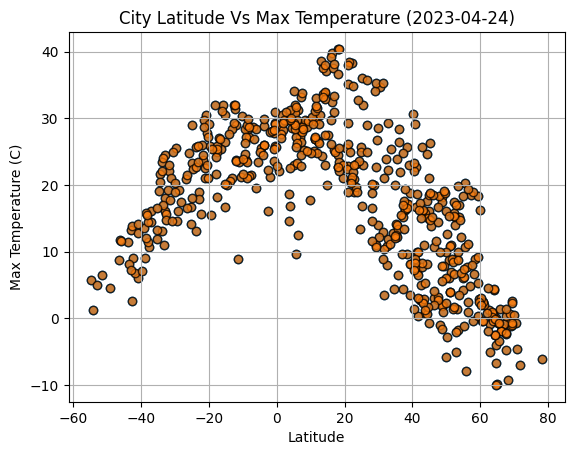

In [10]:
# Build scatter plot for latitude vs. temperature
sec = list(city_data_df['Date'])
time_string = time.strftime("%Y-%m-%d", time.gmtime(sec[0]))

# Incorporate the other graph properties
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis,y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude Vs Max Temperature ({time_string})')
plt.grid(True)
plt.scatter(x_axis,y_axis,edgecolors='black', alpha =0.75)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

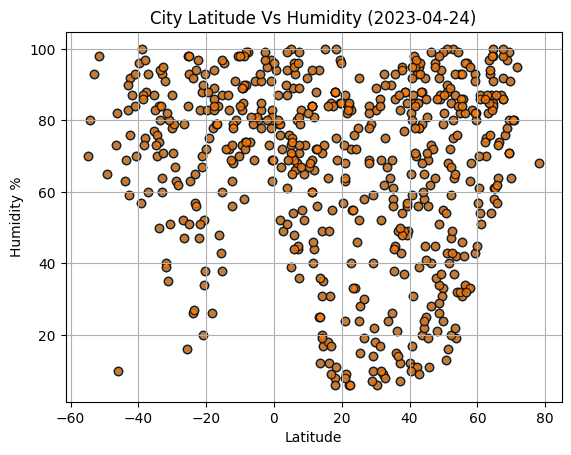

In [11]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis,y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'City Latitude Vs Humidity ({time_string})')
plt.grid(True)
plt.scatter(x_axis,y_axis,edgecolors='black', alpha =0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

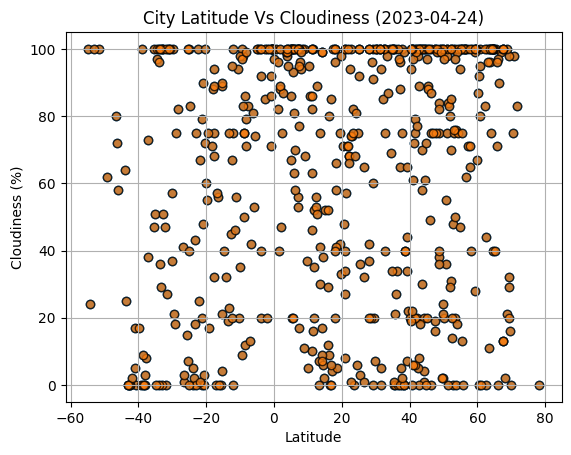

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis,y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude Vs Cloudiness ({time_string})')
plt.grid(True)
plt.scatter(x_axis,y_axis,edgecolors='black', alpha =0.75)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

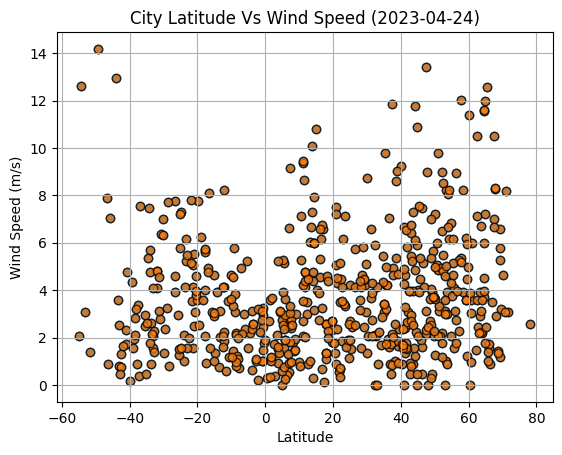

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis,y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude Vs Wind Speed ({time_string})')
plt.grid(True)
plt.scatter(x_axis,y_axis,edgecolors='black', alpha =0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def find_lin_reg(x_axis,y_axis):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis) 
    regress_value = slope*x_axis + intercept
    return(slope,intercept,rvalue,regress_value)

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filt = city_data_df['Lat'] >= 0
northern_hemi_df = city_data_df[filt]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smithers,54.7804,-127.1743,4.18,93,100,2.06,CA,1682326460
2,labrador city,52.9463,-66.9114,-5.05,100,0,0.00,CA,1682326462
4,dudinka,69.4058,86.1778,2.57,80,29,6.56,RU,1682326464
9,palikir - national government center,6.9248,158.1611,27.28,80,100,6.64,FM,1682326469
10,hawaiian paradise park,19.5933,-154.9731,22.80,97,75,1.83,US,1682326470


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filt = city_data_df['Lat'] < 0
southern_hemi_df = city_data_df[filt]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,1.22,80,24,12.61,GS,1682326461
3,edinburgh of the seven seas,-37.0676,-12.3116,14.39,60,73,7.54,SH,1682326463
5,middelburg,-25.7751,29.4648,24.74,16,15,2.97,ZA,1682326465
6,atafu village,-8.5421,-172.5159,28.47,74,12,2.19,TK,1682326466
7,port-aux-francais,-49.3500,70.2167,4.53,65,62,14.18,TF,1682326467


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6675500390498983


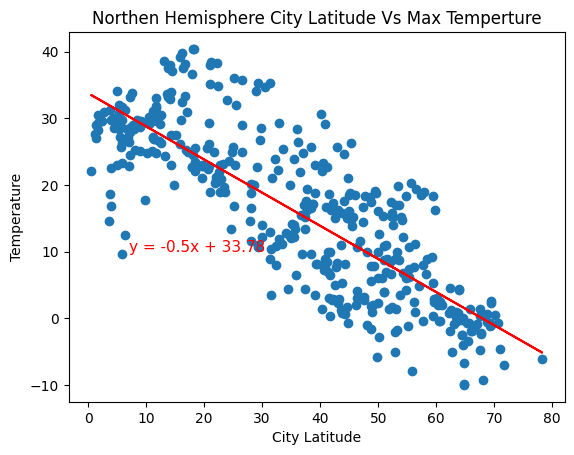

In [28]:
# Linear regression on Northern Hemisphere
x_axis = round(northern_hemi_df['Lat'],2)
y_axis = round(northern_hemi_df['Max Temp'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_value = slope*x_axis + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Temperature')
plt.title(f'Northen Hemisphere City Latitude Vs Max Temperture')

line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(7,10),xytext=(7,10),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

The r-squared is: 0.5854713640506233


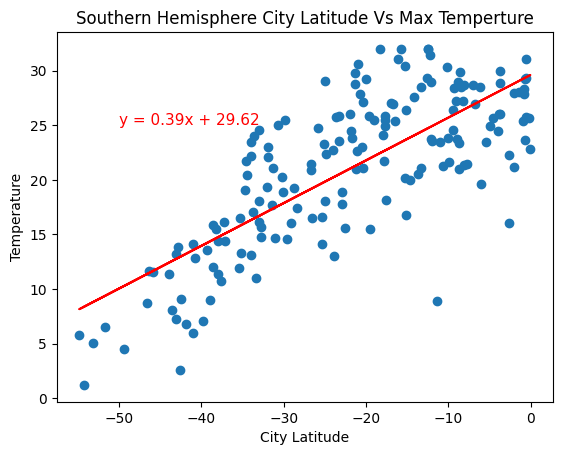

In [29]:
# Linear regression on Southern Hemisphere
x_axis = round(southern_hemi_df['Lat'],2)
y_axis = round(southern_hemi_df['Max Temp'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_value = slope*x_axis + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Temperature')
plt.title(f'Southern Hemisphere City Latitude Vs Max Temperture')

line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(-50,25),xytext=(-50,25),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere - In the Northern Hemisphere, as the Latitude increases above 0 degrees, the teperature drops. There is a significant relationship between these factors as demonstrated by the r-value of 0.6675500390498983.

Southern Hemisphere - In the Southern Hemisphere, as the Latitude decreases below 0 degrees, the temperature drops. There is a moderate relationship between these factors as demonstrated by the r-value of 0.5854713640506233.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.011642454892240648


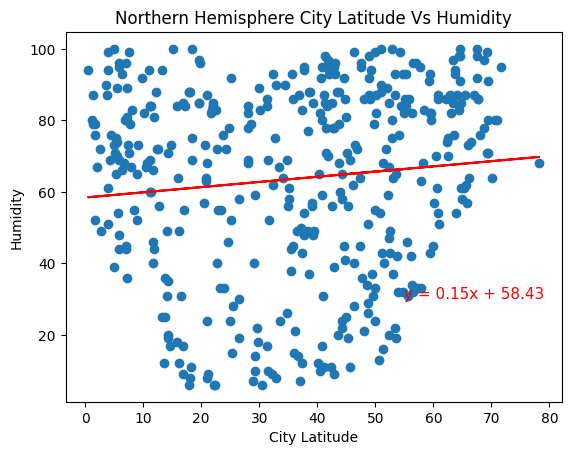

In [30]:
# Northern Hemisphere

x_axis = round(northern_hemi_df['Lat'],2)
y_axis = round(northern_hemi_df['Humidity'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_value = slope*x_axis + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere City Latitude Vs Humidity')

line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(55,30),xytext=(55,30),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

The r-squared is: 0.015521303521796417


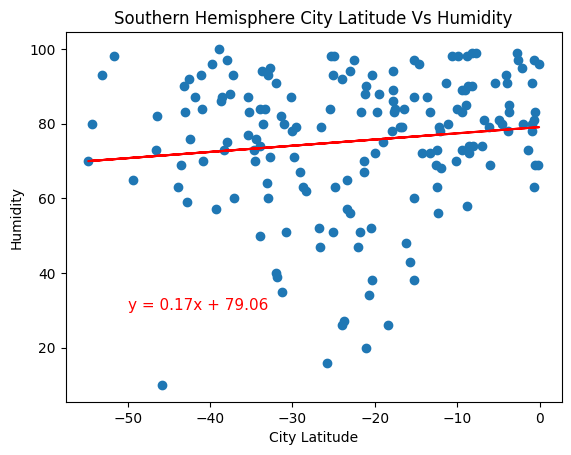

In [31]:
# Southern Hemisphere
x_axis = round(southern_hemi_df['Lat'],2)
y_axis = round(southern_hemi_df['Humidity'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_value = slope*x_axis + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere City Latitude Vs Humidity')

line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(-50,30),xytext=(-50,30),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** In both hemispheres, there is a weak relationship between factors (humidty and latitude)

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 9.530865550130512e-05


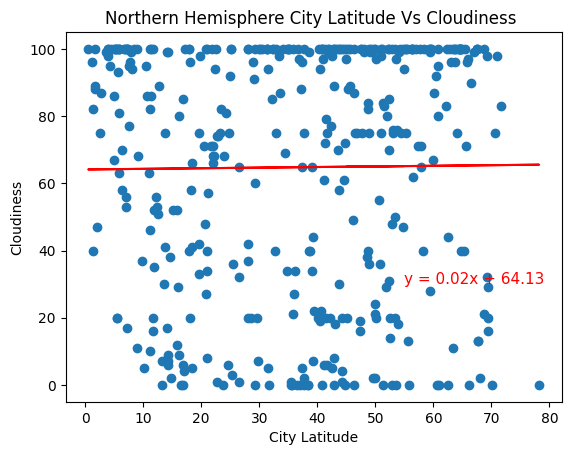

In [34]:
# Northern Hemisphere
x_axis = round(northern_hemi_df['Lat'],2)
y_axis = round(northern_hemi_df['Cloudiness'],2)
results = find_lin_reg(x_axis,y_axis)
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,results[3],"r-")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere City Latitude Vs Cloudiness ')

line_equ = "y = " + str(round(results[0],2)) + "x + " +str(round(results[1],2))
plt.annotate(line_equ,xy=(55,30),xytext=(55,30),fontsize=11,color="red")
print(f"The r-squared is: {results[2]**2}")


plt.show()

The r-squared is: 0.08295597211126875


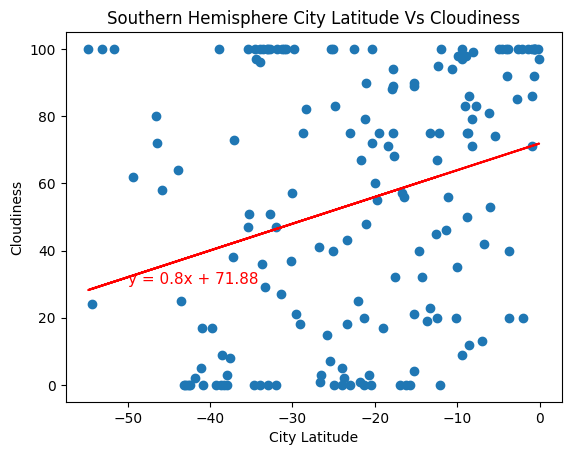

In [33]:
# Southern Hemisphere
x = round(southern_hemi_df['Lat'],2)
y = round(southern_hemi_df['Cloudiness'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_value = slope*x + intercept

# Show scatter plot with regression line
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere City Latitude Vs Cloudiness')

# Line annotation
line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(-50,30),xytext=(-50,30),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is almost no relationship between values, but a very weak relationship exists in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.045836934592352024


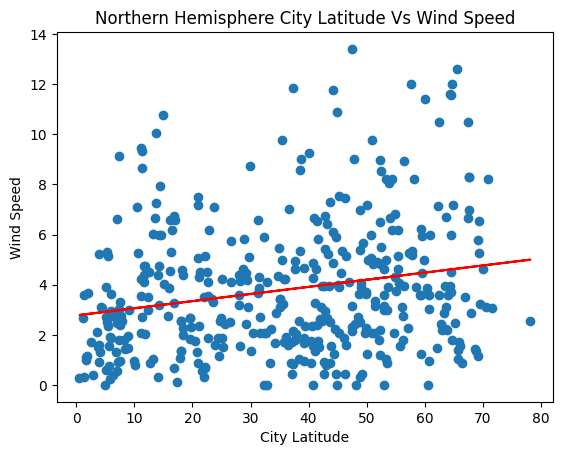

In [35]:
# Northern Hemisphere
x_axis = round(northern_hemi_df['Lat'],2)
y_axis = round(northern_hemi_df['Wind Speed'],2)
results = find_lin_reg(x_axis,y_axis)
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,results[3],"r-")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere City Latitude Vs Wind Speed')

line_equ = "y = " + str(round(results[0],2)) + "x + " +str(round(results[1],2))
plt.annotate(line_equ,xy=(10,15),xytext=(10,15),fontsize=11,color="red")
print(f"The r-squared is: {results[2]**2}")


plt.show()

The r-squared is: 0.05355233331886885


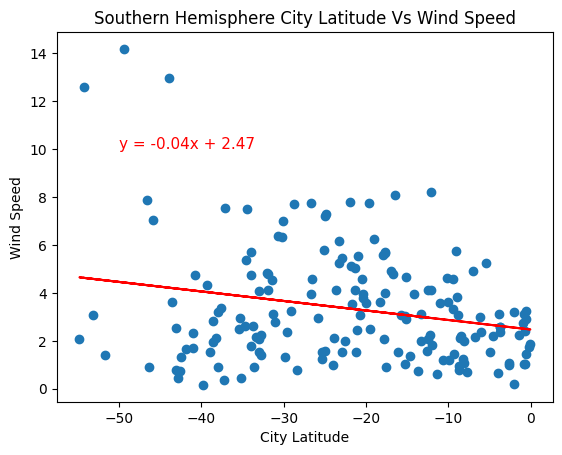

In [36]:
# Southern Hemisphere
x_axis = round(southern_hemi_df['Lat'],2)
y_axis = round(southern_hemi_df['Wind Speed'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_value = slope*x_axis + intercept

# Show scatter plot with regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere City Latitude Vs Wind Speed')

# Line annotation
line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(-50,10),xytext=(-50,10),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** In both hemispheres, there is a very weak relationship between the factors.